# Lens coordinates on Moore space

In this example, we use lens coordinates to parametrize a finite sample of the Moore space $M(1,\mathbb{Z}/3)$, characterized by the fact that its reduced cohomology with coefficients in $\mathbb{Z}$ is zero in every degree except for degree $1$, in which it is $\mathbb{Z}/3$.

In [1]:
from dreimac import LensCoords, CircleMapUtils, PlotUtils, GeometryExamples, LensMapUtils

The Moore space $M(1,\mathbb{Z}/3)$ can be constructed by taking a quotient of the two-dimensional unit disk $D \subseteq \mathbb{R}^2$, where each point in the boundary is glued to its rotation by $2\pi/3$ radians. Here, we display a fundamental domain. We color points so that points in the boundary with the same color are close to each other.
In order to perform the gluing, we use a function that constructs a distance matrix implementing the gluing described above.

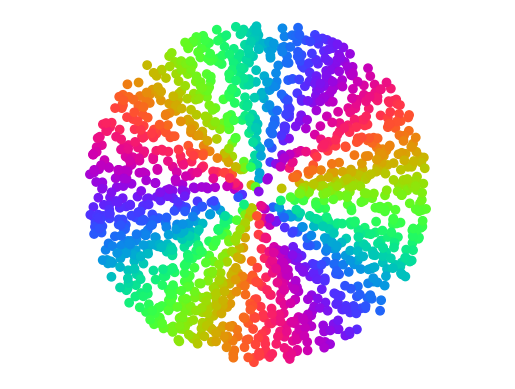

In [2]:
import numpy as np
import matplotlib.pyplot as plt

q = 3
dist_mat, X = GeometryExamples.moore_space_distance_matrix(rough_n_points=2000, prime=q)
colors = CircleMapUtils.to_sinebow(np.array([np.arctan2(*x) * q for x in X]))

plt.figure()
plt.scatter(X[:,0],X[:,1],c=colors)
_ = plt.axis("equal")
_ = plt.axis("off")

We confirm that the sample approximates the Moore space by computing persistent cohomology with coefficients in $\mathbb{Z}/2$ and $\mathbb{Z}/3$.

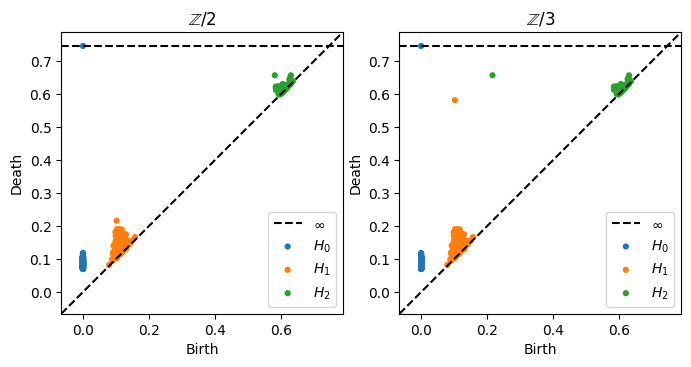

In [3]:
from ripser import ripser
from persim import plot_diagrams
plt.figure(figsize=(8, 4))
for i,prime in enumerate([2,3]):
    pd = ripser(dist_mat, coeff=prime, maxdim=2, n_perm=300, distance_matrix=True)['dgms']
    plt.subplot(1,2,i+1) ; plot_diagrams(pd) ; _ = plt.title("$\mathbb{Z}/" + str(prime) + "$")

We now compute Lens coordinates and display them in the fundamental domain given by the three-dimensional disk in $\mathbb{R}^3$.
The plot is easier to understand if you interact with it yourself!

In [4]:
lc = LensCoords(dist_mat, n_landmarks=500, distance_matrix=True)
coords = lc.get_coordinates(perc=0.99, complex_dim=2, cocycle_idx=0)
coords_R3 = LensMapUtils.lens_3D_to_disk_3D(coords, 3)

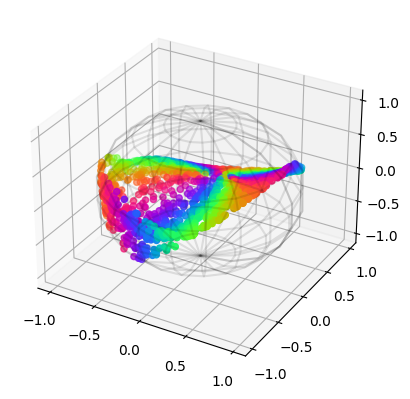

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
PlotUtils.plot_3sphere_mesh()
_ = ax.scatter3D(coords_R3[:,0], coords_R3[:,1], coords_R3[:,2], s=20, c=colors)